# Python Programming Crash Course 
# Lego brick figures

<br>
<div>
<img src="data/Python-logo-notext.svg" width="200"/>
</div>

Time to bring in more color ...

<br>
<div>
<img src="data/colors.jpg" width="400"/>
</div>

## Introduction

Previously, we have seen how you can create plots from a <font color="green">**DataFrame**</font> directly. All this functionality we have seen, depends on the <font color="green">**matplotlib**</font> package. The <font color="green">**pandas**</font> package incorporates functions from <font color="green">**matplotlib**</font>, which in turn takes care of
the whole visualization. The aim of <font color="green">**pandas**</font> here is, to provide a user-friendly interface to 
create basic plots and explore your data visually and is quite easy and quick to use.

However, if you want to create more complex plots and <font color="green">**Figures**</font> or you need a little more customization to create your
perfect <font color="green">**Figure**</font>, you might want to use <font color="green">**matplotlib**</font> directly.

<font color="green">**matplotlib**</font> has been around for ages and it's initial idea was to allow to create statistical analysis plots
from MatLab, a highly powerful mathematical software environment, in Python.

With <font color="green">**matplotlib**</font>, you can customize and control every aspect and detail of your <font color="green">**Figure**</font> and create even very complex custom made
plots yourself. It's the backend for both <font color="green">**pandas**</font> and <font color="green">**seaborn**</font> and both packages build upon <font color="green">**matplotlib**</font>.


It offers a wide variety of plots and let's you tweak everything about it.
If you want an overview of what plots you can do, take a look at the <font color="green">**matplotlib**</font> gallery:
    
    https://matplotlib.org/stable/gallery/index.html



## Prerequisites

First we need to import some stuff and get some data to plot.

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's create some values from simple math functions to plot. 

In [3]:
# generate some data

x_values = np.linspace(0, 5, 26)  # x = 0, ... , 5
y_values_linear = x_values * 10  # a linear function: y = 10x
y_values_square = x_values ** 2  # a square function: y = x^2
y_values_cubic = np.power(x_values, 3)  # a cubic function: y = x^3

In addition, we want some real-world data. Import the iris data set from file,\
it's a data set containing measurements from 150 iris samples (the plant, zu deutsch Schwertlilien):

In [4]:
# get the iris data
df_iris = pd.read_csv("data/iris.csv")
df_iris = df_iris.rename(lambda x: x.replace(" (cm)", ""), axis=1)  # let's get rid of those units
df_iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We might need a <font color="green">**DataFrame**</font> with only numeric values later. Let's create this by using **`.select_types()`**.

In [5]:
# get a dataframe with numeric values only

df_iris_numeric = df_iris.select_dtypes(float)
df_iris_numeric.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We also could use some descriptive statistics to plot. For this, let's calculate the means and standard deviations:

In [6]:
# get the means and standard deviation of our iris data

iris_means = df_iris.groupby("species").mean()
display(iris_means)

iris_std = df_iris.groupby("species").std()
display(iris_std)


,sepal length,sepal width,petal length,petal width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


,sepal length,sepal width,petal length,petal width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


## General concepts

The class structure of <font color="green">**matplotlib**</font> can seem a little chaotic at first. <font color="green">**matplotlib**</font> strongly uses the object-oriented paradigm: Everything about a <font color="green">**Figure**</font> is again an object. Since you're already familiar with the concept of classes, here are the major classes that are important for you:

1. <font color="green">**Figure**</font>

   A <font color="green">**Figure**</font> is a complete <font color="green">**Figure**</font> that may contain one or multiple plots. Think of it as the canvas you are painting on. Everything you display is drawn upon that canvas.
   
3. <font color="green">**Axes**</font>

   While the name may is confusing, this is actually what we would consider a plot. It's the thing you draw upon your canvas. A
   <font color="green">**Figure**</font> may contain multiple <font color="green">**Axes**</font>. This is not to be confused with an <font color="green">**Axis**</font>!
   
5. <font color="green">**Axis**</font>

    An <font color="green">**Axis**</font> is naturally the <font color="green">**Axis**</font> (x/y/z-axis) of a plot, so an <font color="green">**Axes**</font> contains usually 2 (2D plot) or 3 <font color="green">**Axis**</font> (3D plot). Yes, the naming sucks.
   
7. <font color="green">**Artist**</font>s

   These are all the little things you draw on your plot, e.g. lines, dots, shapes or text.


To confuse you thoroughly and give you a reference sheet, these are the elements you might encounter in a <font color="green">**Figure**</font>:

<br>
<div>
<img src="data/anatomy.webp" width="600"/>
</div>

## Creating <font color="green">**Figures**</font>

Let's create some <font color="green">**Figures**</font>! 

First we plot the square function, for which we have calculated the values above.
For this, we can use the **`.plot()`** function:

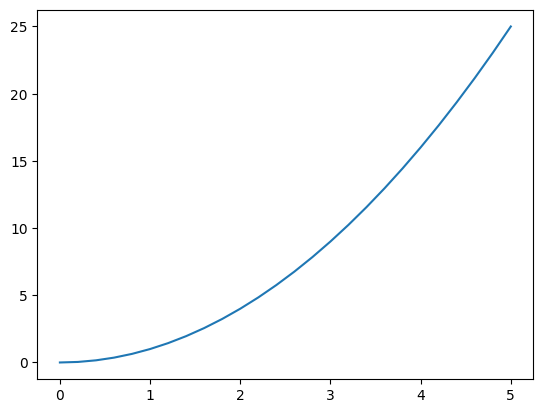

In [7]:
# a simple plot
plt.plot(x_values, y_values_square)  # plot x versus y
plt.show()  # show it

**`.plot()`**, by default plots x versus y as a line plot. 
**`.show()`** just tells the computer to display the figure. In jupyter notebooks you don't really need this, as 
the plots are shown automatically after a cell is executed.

However, that plot is not very informative. Let's tweak it a little ...

- add a title
- add labels for the x/y axis

You can simply call appropriate functions that will add certain elements to the plot:

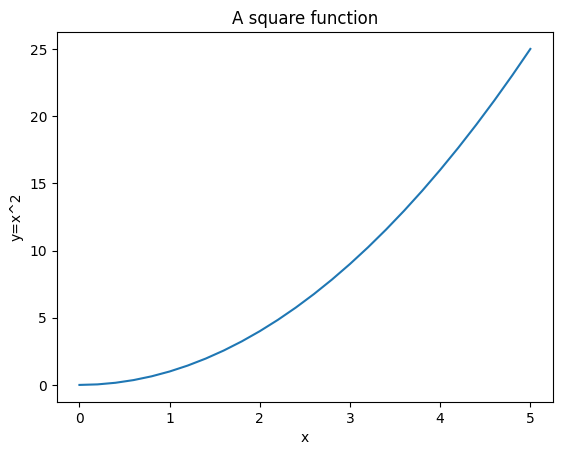

In [8]:
# create a better plot

plt.plot(x_values, y_values_square)
plt.title("A square function")  # add a title
plt.xlabel("x")  # add an x axis label
plt.ylabel("y=x^2")  # add a y axis label
plt.show()  # show the Figure

When we call the plot() function, a lot of things happen implicitly: A <font color="green">**Figure**</font> object (out canvas) is created, an <font color="green">**Axes**</font> (our actual plot) is created within the <font color="green">**Figure**</font>, an X and a Y Axis is added and finally it actually draws our <font color="green">**Artist**</font> (the line itself).

Notice the way we use these functions. By simply calling them one after another, these elements are magically 
added to the <font color="green">**Figure**</font>/<font color="green">**Axes**</font>. That is because <font color="green">**matplotlib**</font> keeps track of the current <font color="green">**Figure**</font> and current <font color="green">**Axes**</font> and automatically applies the functions **`plt.title()`** and **`plt.xlabel()`** on the last <font color="green">**Figure**</font>/<font color="green">**Axes**</font> created. 

You can also do these things explicitly, e.g. creating the <font color="green">**Figure**</font> yourself, before calling the **`.plot()`** function. 
Accordingly, <font color="green">**matplotlib**</font> will know that the <font color="green">**Figure**</font> you've created yourself is the current <font color="green">**Figure**</font> and should be used from now on. That means calling the plot function afterwards will not create another <font color="green">**Figure**</font> object, because we already have a <font color="green">**Figure**</font>.

Doing this implicitly is useful, if we want to change some properties of these objects.
For example, you can adjust the size of the canvas using the `figsize` parameter or its resolution using the `dpi` parameter:


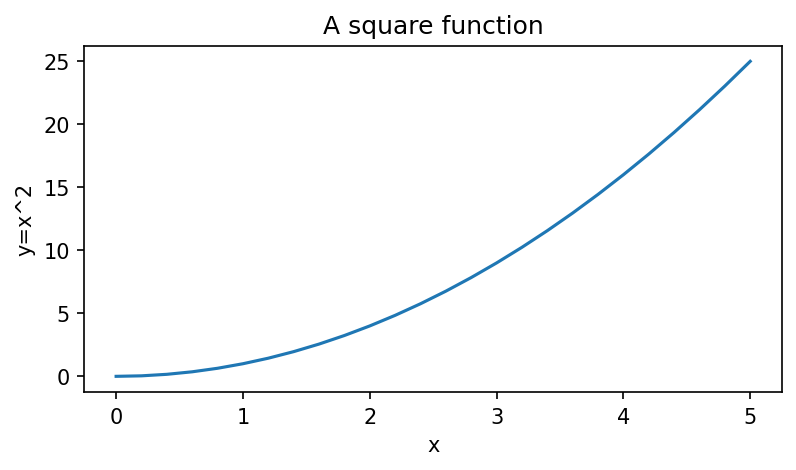

In [9]:
# create the figure explicitly with higher resolution

plt.figure(figsize=(6, 3), dpi=150)  # create the figure explicitly
plt.plot(x_values, y_values_square)  # plot the square function
plt.title("A square function")  # add a title
plt.xlabel("x")  # add an x axis label
plt.ylabel("y=x^2")  # add a y axis label
plt.show()  # show the figure

If you want to draw multiple lines, you can just call plot() again:

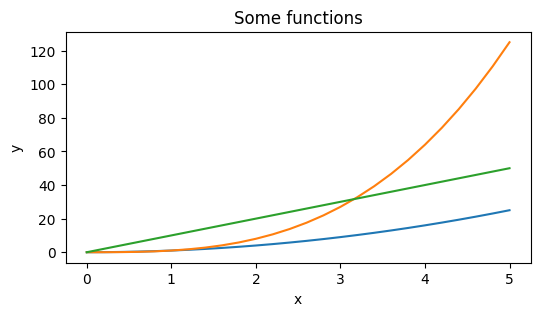

In [10]:
# draw multiple lines

plt.figure(figsize=(6, 3))  # create the figure explicitly
plt.plot(x_values, y_values_square)  # plot the square function
plt.plot(x_values, y_values_cubic)  # plot the cubic function
plt.plot(x_values, y_values_linear)  # plot the root function
plt.title("Some functions")  # add a title
plt.xlabel("x")  # add an x axis label
plt.ylabel("y")  # add a y axis label
plt.show()  # show the figure

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

What also happens behind the scenes is, that <font color="green">**matplotlib**</font> picks colors and line styles for you, so that with each call of **`.plot()`** a new color is chosen. You can also set markers for each data point that you have. If you call plot without anything, markers are automatically turned off.

Obviously, we can do that stuff ourselves and set `color`, `marker`, `linestyle` and other things explicitly as well:

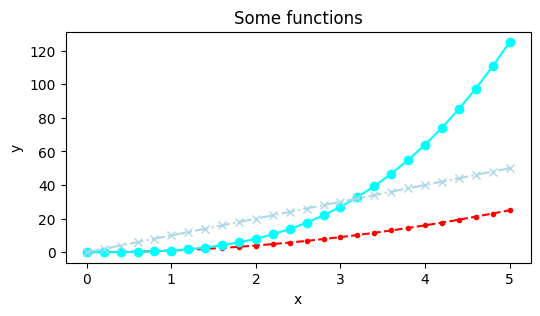

In [15]:
# customize the lines, markers and colors

plt.figure(figsize=(6, 3))  # create the figure explicitly
plt.plot(x_values, y_values_square, color="red", marker=".", linestyle="--")  # plot the square function
plt.plot(x_values, y_values_cubic, color="cyan", marker="o", ls="-")  # plot the cubic function
plt.plot(x_values, y_values_linear, c="blue", marker="x", ls="-.")  # plot the root function
plt.title("Some functions")  # add a title
plt.xlabel("x")  # add an x axis label
plt.ylabel("y")  # add a y axis label
plt.show()  # show the figure

What happens?

<details>
    <summary><font color="orange"><b>Click me!</b></font></summary>
    Apparently, plotting functions can take a ton of parameter to customize the output:
    <ul>
    <li>'marker' takes a string that specifies the marker symbol</li>
    <li>'c' or 'color' secifies the line color</li>
    <li>'ls' or 'linestyle' specifies the type of line it draws</li>
    </ul>
</details>

For convenience, your can combine color, marker and linestyle into a single format string argument 'fmt':

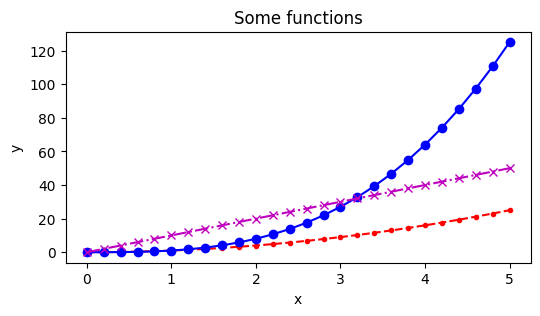

In [16]:
# introducing the fmt argument

plt.figure(figsize=(6, 3))  # create the figure explicitly
plt.plot(x_values, y_values_square, ".--r")  # plot the square function
plt.plot(x_values, y_values_cubic, "o-b")  # plot the cubic function
plt.plot(x_values, y_values_linear, "x-.m")  # plot the root function
plt.title("Some functions")  # add a title
plt.xlabel("x")  # add an x axis label
plt.ylabel("y")  # add a y axis label
plt.show()  # show the figure

What happens?

<details>
    <summary><font color="orange"><b>Click me!</b></font></summary>
    Instead of suppplying 'marker', line and color parameters, we add a single formast string, that is simply a combination of all three arguments:</br>
    fmt = <font color="cyan">'[marker][line][color]'**</font> </br>
    So, for example, ".--r" id equivalent to marker=".", linestyle="--", color="r".</br>
    Each of these three elements is optional, so '.r' is also a valid argument. </br>
    And even the order can be changed, so "r.--" is equivalent to ".--r"
</details>

It is generally a good idea to set these things (marker, linestyle, color) explicitly rather than using the fmt string argument, as it is more readable.

And we can also add a legend:

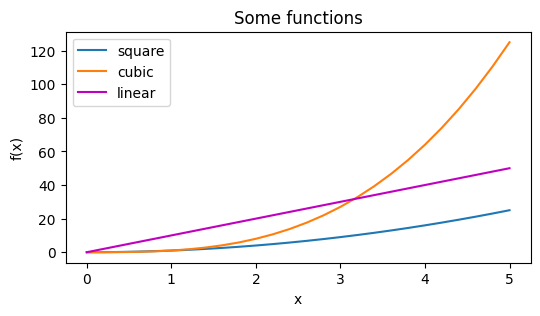

In [17]:
# add a legend

plt.figure(figsize=(6, 3))  # create the figure explicitly
plt.plot(x_values, y_values_square, label="square")  # plot the square function
plt.plot(x_values, y_values_cubic, label="cubic")  # plot the cubic function
plt.plot(x_values, y_values_linear, label="linear", color="m")  # plot the root function
plt.title("Some functions")  # add a title
plt.xlabel("x")  # add an x axis label
plt.ylabel("f(x)")  # add a y axis label
plt.legend()
plt.show()  # show the figure

What else is there to adjust the appearance of our lines? **`.plot()`** has a ton of optional arguments.
Some of the more common once to adjust the style and appearance of the lines are:

| parameter | allowed values | what it does |
|-|-|-|
| linestyle or ls| string of ['-' or "solid", '--' or "dashed",'-.' or "dashdotted", ':' or "dotted", ... ] | defines the line style | 
| linewidth or lw | float | sets the line width |
| marker | string of ['.', ',', 'o', 'v', '^', '<', '>', '1', ...] | sets the marker symbol | 
| markersize or ms | float | sets the size of the marker | 
| color | string of ["b", "g", "r", "c", "m", "y", "k", "w"], a hex code, (e.g. #FF1234'), a color name (e.g. "green", "lightblue", ...) | sets the line color |
| markerfacecolor or mfc | as in color | sets the marker face color |
| markeredgecolor or mec | as in color | sets the marker edge color |
| alpha | a float between 0.0 and 1.0 | sets transparency |


Try it out !

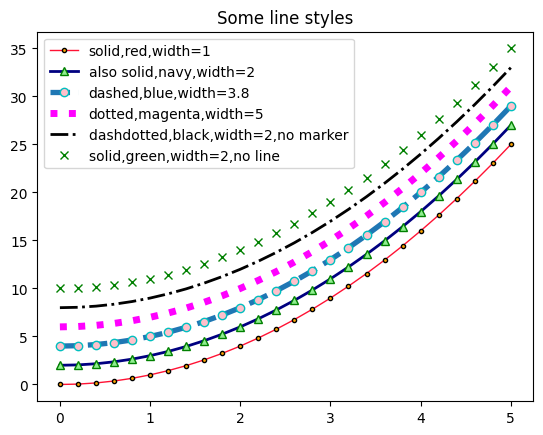

In [18]:
# plot some line styles

plt.plot(
    x_values, y_values_square, ls="solid", color="#FF1234", lw=1, marker=".",
    mfc="orange", mec="k", label="solid,red,width=1")
plt.plot(x_values, y_values_square+2, ls="-", color="navy", lw=2, marker="^",
    mfc="lightgreen", mec="g", label="also solid,navy,width=2"
)
plt.plot(x_values, y_values_square+4, ls="--", lw=3.8, marker="o",
    mfc="pink", mec="c", label="dashed,blue,width=3.8"
)
plt.plot(x_values, y_values_square+6, ls=":", lw=5,
    color="magenta", label="dotted,magenta,width=5"
)
plt.plot(x_values, y_values_square+8, ls="-.", lw=2,
    color="k", label="dashdotted,black,width=2,no marker"
)
plt.plot(x_values, y_values_square+10, ls="", lw=2, marker="x",
    color="g", label="solid,green,width=2,no line"
)
plt.title("Some line styles")
plt.legend()

## Saving a <font color="green">**Figure**</font>

Of course, you can save <font color="green">**Figures**</font> to file. You can do this by calling **`.savefig()`**. You can save <font color="green">**Figures**</font> as
**.png** (the default), **.jpg** **.pdf**, **.ps**, **.eps** and **.svg**. 

When you call simply

```python
plt.savefig(filename_with_extension)
```
it will save the current <font color="green">**Figure**</font> in it's current state.\
You can also call savefig as a <font color="green">**Figure**</font> method like this:

```python
fig = plt.figure()
...
fig.savefig(filename_with_extensions)
```

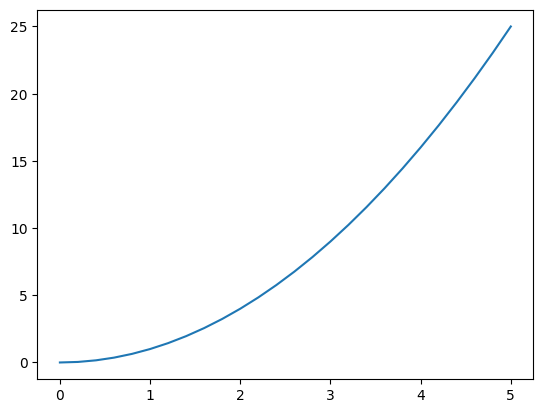

In [7]:
# save a figure
plt.plot(x_values, y_values_square, label="square")  # plot the square function
plt.savefig("test.svg")

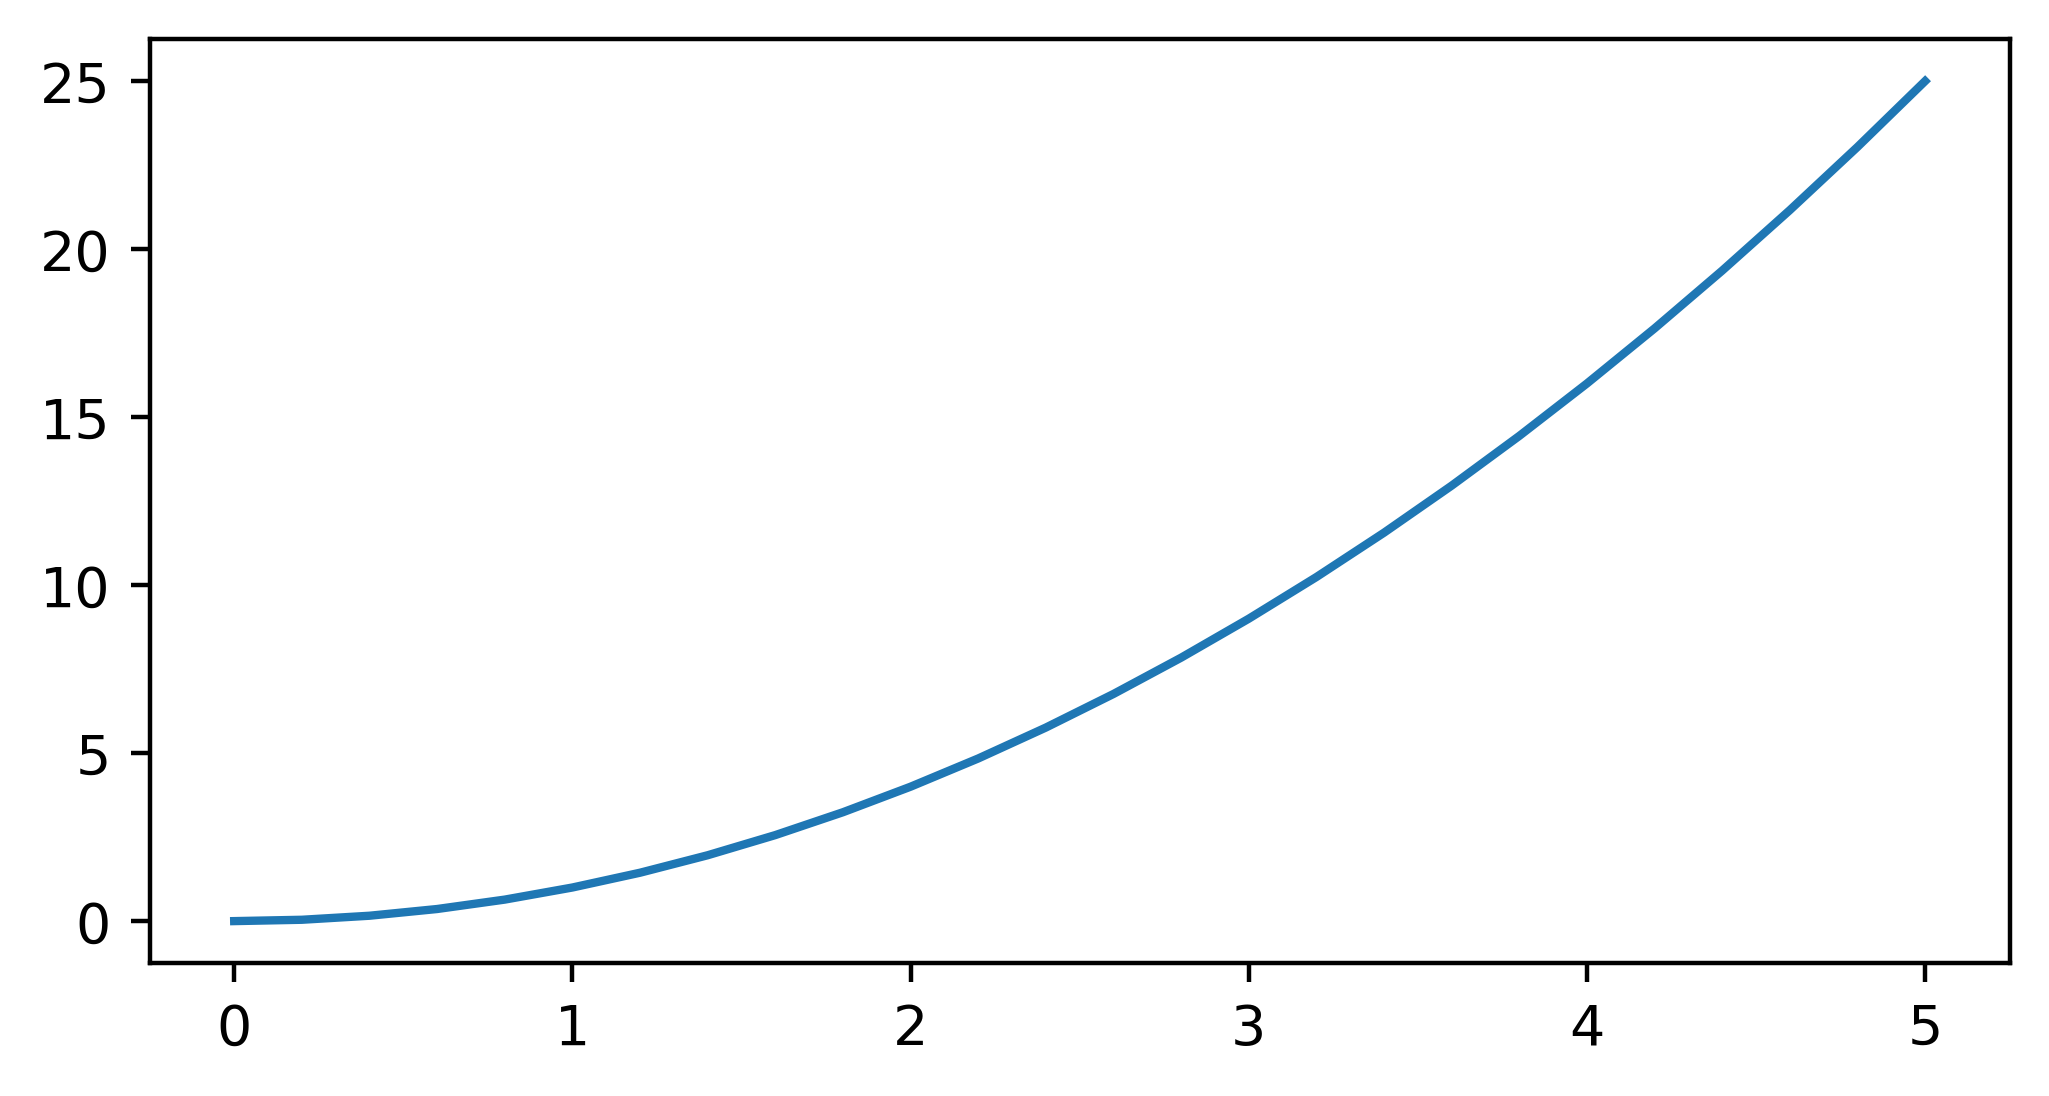

In [9]:
# create a figure, change dpi and call savefig on a figure

f = plt.figure(dpi=400, figsize=(6, 3))
plt.plot(x_values, y_values_square, label="square")  # plot the square function
f.savefig("test.jpg")

## Coding styles

In the examples above we just called the pyplot functions consequtively and let <font color="green">**matplotlib**</font> handle what to do with it, i.e. where to plot the line, etc. This style of coding is the pyplot style.

There are however two ways to use <font color="green">**matplotlib**</font>:

- pyplot style
- object-oriented style
    
The latter one is more explicit and we actually handle the objects that are created (i.e. <font color="green">**Figure**</font>, <font color="green">**Axes**</font>, ...) ourselves.

Let's take the function from above again:

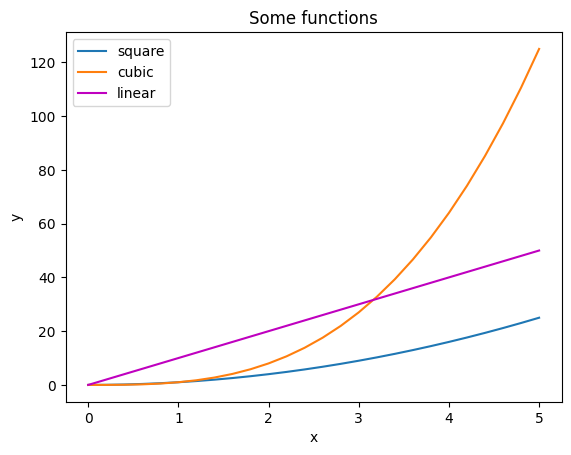

In [10]:
# the function from above, pyplot style

plt.plot(x_values, y_values_square, label="square")  # plot the square function
plt.plot(x_values, y_values_cubic, label="cubic")  # plot the cubic function
plt.plot(x_values, y_values_linear, label="linear", color="m")  # plot the root function
plt.title("Some functions")  # add a title
plt.xlabel("x")  # add an x axis label
plt.ylabel("y")  # add a y axis label
plt.legend()
plt.show()  # show the figure

Doing the same function in an object-oriented way, we can do this:

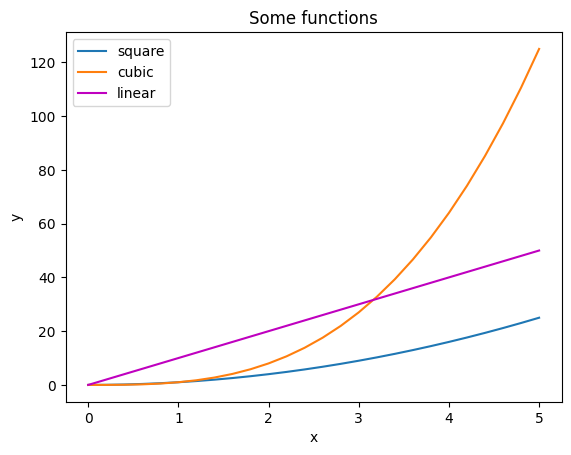

In [11]:
# the equivalent figure using OO style

fig, axe = plt.subplots()  # create a Figure and Axes
axe.plot(x_values, y_values_square, label="square")  # plot the square function
axe.plot(x_values, y_values_cubic, label="cubic")  # plot the cubic function
axe.plot(x_values, y_values_linear, label="linear", color="m")  # plot the root function
axe.set_title("Some functions")  # add a title
axe.set_xlabel("x")  # add an x axis label
axe.set_ylabel("y")  # add a y axis label
axe.legend()

What happens:

<details>
    <summary><font color="orange"><b>Click me!</b></font></summary>
- we create a Figure object named fig and an <font color="green">**Axes**</font> object called axe using plt.subplots()</br>
- now we can call the plot function explicitly on the axe instead of letting <font color="green">**matplotlib**</font> do the work</br>
- we manipulate elements of the <font color="green">**Axes**</font> object by using it's own functions (e.g. set_title, set_ylabel)
</details>


    
    
## Input types

<font color="green">**matplotlib**</font> assumes that the data you supply to the plotting function are <font color="green">**NumPy**</font> arrays, as we used above:

In [12]:
# what are the data inputs for plotting?

print(type(x_values))
print(type(y_values_square))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


But, it can usually deal with array-like data, like simple python lists or <font color="green">**pandas**</font> <font color="green">**DataFrames**</font> and <font color="green">**Series**</font>.\
However, you must be careful with these, as the result might be unexpected.

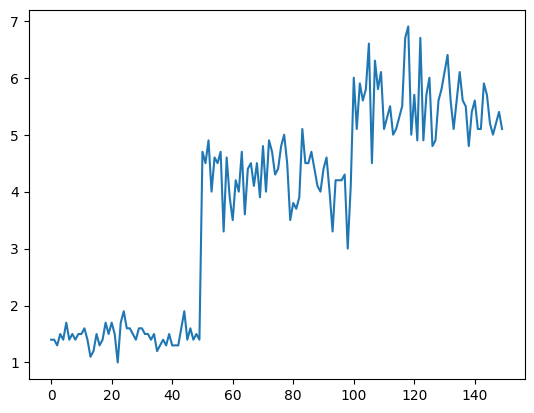

In [13]:
# pass Series or DataFrames directly to matplotlib plotting functions

plt.plot(df_iris["petal length"])

In [14]:
# remind we, what did the iris data look like?
df_iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


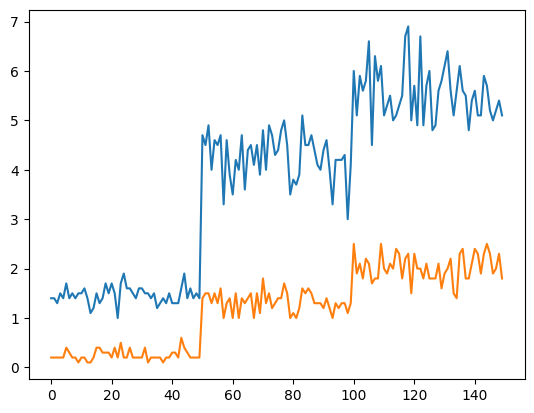

In [15]:
plt.plot(df_iris[["petal length", "petal width"]])

## Multiple plots in one <font color="green">**Figure**</font>

Assume we want to combine multiple plots into a single <font color="green">**Figure**</font>. That's easily done since we can add as many <font color="green">**Axes**</font> to a <font color="green">**Figure**</font> as we like and essentiually what **`plt.subplots()`** is used for.

Figure(640x480)
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


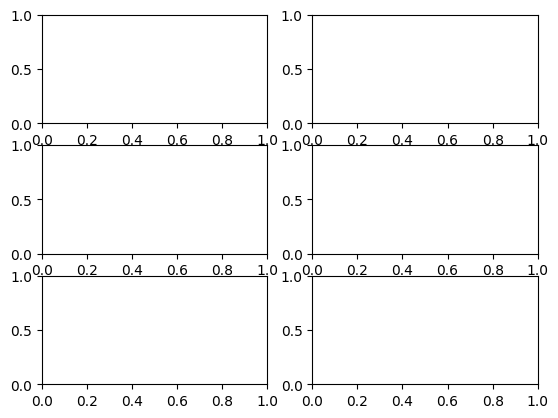

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2)  # create a Figure and an array of Axes
print(fig)
print(axes)

The function **`subplots()`** creates the <font color="green">**Figure**</font> and an array of <font color="green">**Axes**</font>. The idea is to divide the canvas into a grid of nrows x ncols and create an <font color="green">**Axes**</font> in each grid.
In this example, 6 <font color="green">**Axes**</font> objects, as specified by the number of rows (3) x numer of columns (2).

We can access each <font color="green">**Axes**</font> individually by indexing the row/column of the <font color="green">**Axes**</font> within the array and plot something:

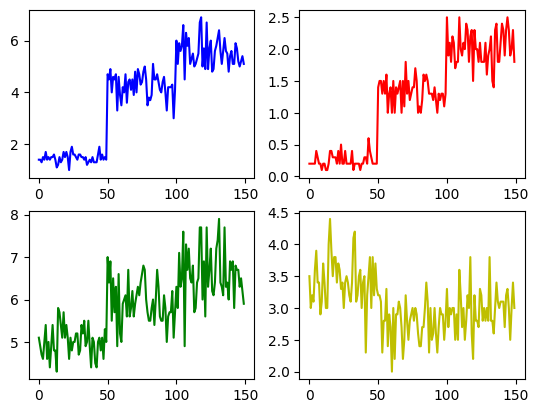

In [17]:
# create subplots and plot something

fig, axes = plt.subplots(nrows=2, ncols=2)  # create a Figure and an array of Axes
axes[0, 0].plot(df_iris["petal length"], "b")
axes[0, 1].plot(df_iris["petal width"], "r")
axes[1, 0].plot(df_iris["sepal length"], "g")
axes[1, 1].plot(df_iris["sepal width"], "y")


You can also create a figure first and then add the <font color="green">**Axes**</font> as you go along:

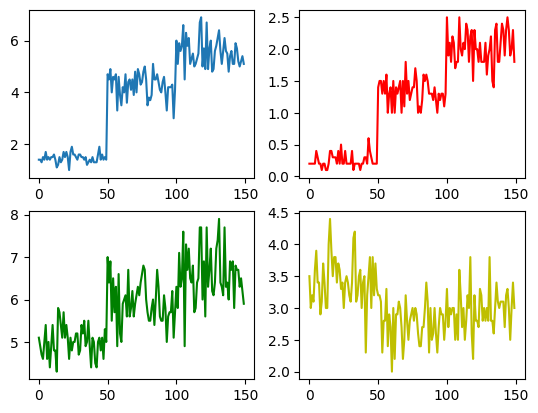

In [22]:
# doing the thing pyplot style

fig = plt.figure()  # create a figure
fig.add_subplot(2, 2, 1)  # add Axes 1
plt.plot(df_iris["petal length"])  # plot something
fig.add_subplot(2, 2, 2)  # add Axes 2
plt.plot(df_iris["petal width"], "r")  # plot something
axe2 = fig.add_subplot(2, 2, 3)  # add Axes 3
axe3 = fig.add_subplot(2, 2, 4)  # add Axes 4
plt.plot(df_iris["sepal width"], "y")
axe2.plot(df_iris["sepal length"], "g")

What happens?

**`Figure.add_subplot(nrows, ncols, index)`** adds an <font color="green">**Axes**</font> to the <font color="green">**Figure**</font>.
More precisely, it assumes a partitioning of the <font color="green">**Figure**</font> canvas in the same manner as with **`subplots()`** into `nrows` x `ncols` sections. Then it selects the sections to be used via the `index`.\
The `index` ordering is from left to right, from top to bottom and it's a <font color="red">**1-based index!**</font> That means an index of one selects the first upper-left section.


Using **`Figure.add_subplot()`** approach offers somewhat more flexibility, as it can assume a different separation of the canvas with each call. This allows you to make <font color="green">**Axes**</font> with different sizes:

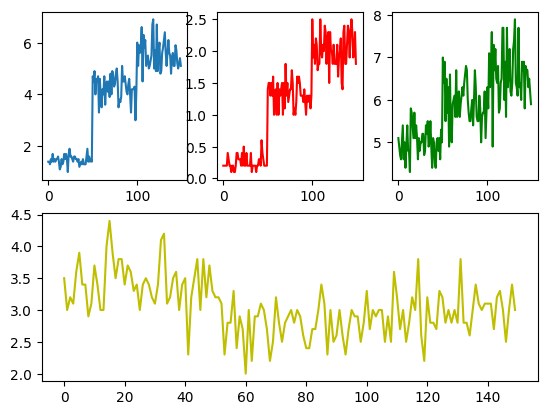

In [23]:
# make three equal sized Axes and a larger one

fig = plt.figure()  # create a figure
fig.add_subplot(2, 3, 1)  # add Axes 1 that takes up half of the canvas height and a third of the canvas width
plt.plot(df_iris["petal length"])  # plot something
fig.add_subplot(2, 3, 2)  # add Axes 2 
plt.plot(df_iris["petal width"], "r")  # plot something
fig.add_subplot(2, 3, 3)  # add Axes 3
plt.plot(df_iris["sepal length"], "g")
axe3 = fig.add_subplot(2, 1, 2)  # add a bigger Axes 4 that uses the full canvas width
plt.plot(df_iris["sepal width"], "y")


The index can also specify multiple sections by using a tuple (first_index, last_index):

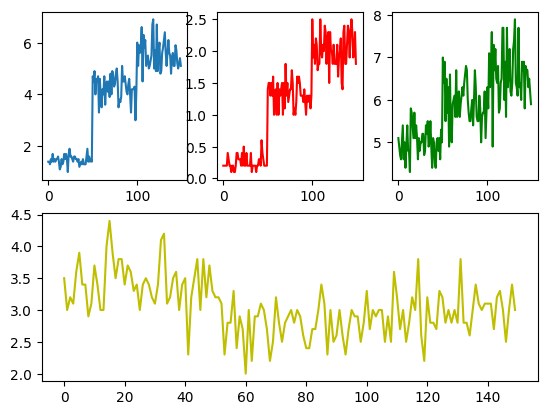

In [24]:
# specifying the span of indices to cover

fig = plt.figure()  # create a figure
fig.add_subplot(2, 3, 1)  # add Axes 1 that takes up half of the canvas height and a third of the canvas width
plt.plot(df_iris["petal length"])  # plot something
fig.add_subplot(2, 3, 2)  # add Axes 2 
plt.plot(df_iris["petal width"], "r")  # plot something
fig.add_subplot(2, 3, 3)  # add Axes 3
plt.plot(df_iris["sepal length"], "g")

axe3 = fig.add_subplot(2, 3, (4, 6))  # add a bigger Axes 4 that uses the full canvas width by specifying section 4, 5 and 6
plt.plot(df_iris["sepal width"], "y")


What if we need <font color="green">**Axes**</font> with variable sizes?\
We can also add <font color="green">**Axes**</font> to a <font color="green">**Figure**</font> manually by specifying the exact position.\
For this, we can use **`Figure.add_axes()`**, wich takes a rectangle as argument, a tuple of (left, bottom, width, height), that defines the borders of the <font color="green">**Axes**</font> within the <font color="green">**Figure**</font>.


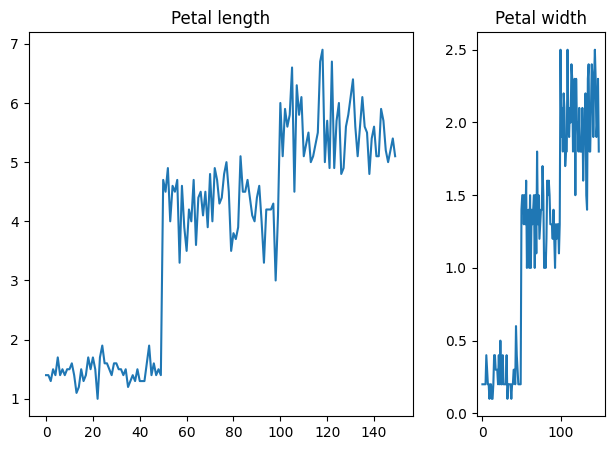

In [25]:
# create a figure and add custom-sized axes
f = plt.figure()
f.add_axes((0.1, 0.1, 0.6, 0.8))
plt.title("Petal length")
plt.plot(df_iris["petal length"])
f.add_axes([0.8, 0.1, 0.2, 0.8])
plt.title("Petal width")
plt.plot(df_iris["petal width"])


## Different type of plots

Obviously, we don't want to do line plots all the time. Let's see some other plot types:
    
- line plot: **`pyplot.plot()`**
- bar chart: **`pyplot.bar()`** and **`pyplot.barh()`**
- histograms: **`pyplot.hist()`**
- scatter plot: **`pyplot.scatter()`**
- box plots: **`pyplot.boxplot()`**
- violin plots: **`pyplot.violinplot()`**
- pie charts: **`pyplot.pie()`**
- heatmaps: **`pyplot.imshow()`**
    
### 1. Line plots

We have already done lots of those. They need at least x and y data as argument.\
Let's try one with error bars ... for this you can use **`pyplot.errorbar()`**:

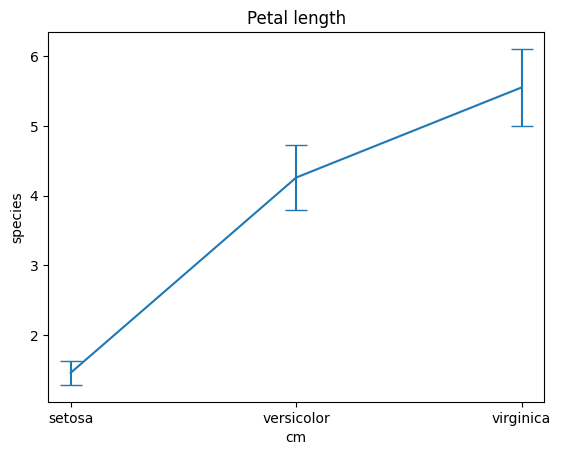

In [28]:
# if you want error bars

plt.errorbar(x=iris_means.index, y=iris_means["petal length"], yerr=iris_std["petal length"], capsize=8)
plt.title("Petal length")
plt.xlabel("cm")
plt.ylabel("species")
plt.show()

### 2. bar chart

You can do bar charts using **`plt.bar()`**:

In [29]:
display(iris_means)

,sepal length,sepal width,petal length,petal width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Text(0.5, 0, 'species')

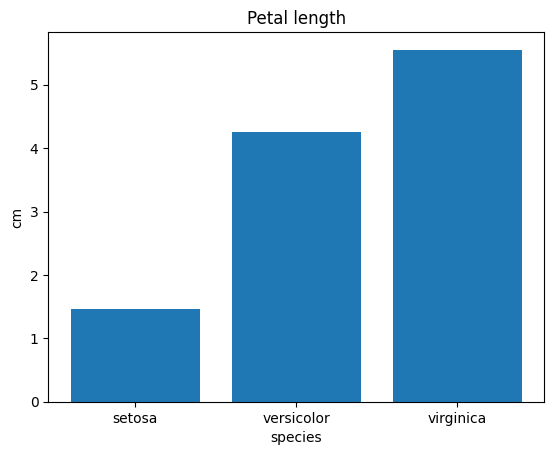

In [30]:
# plot bars

plt.bar(x=iris_means.index, height=iris_means["petal length"])
plt.title("Petal length")
plt.ylabel("cm")
plt.xlabel("species")

Text(0.5, 0, 'species')

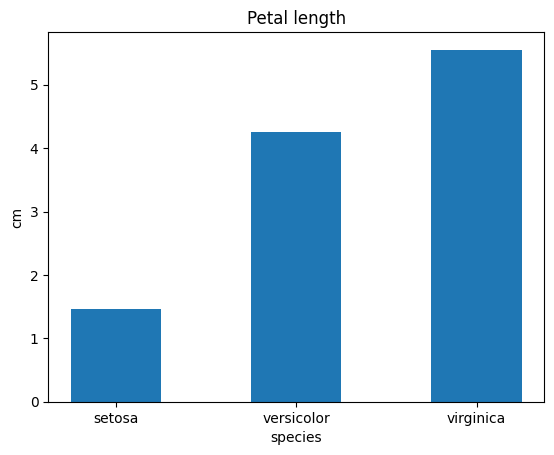

In [31]:
# width
plt.bar(x=iris_means.index, height=iris_means["petal length"], width=0.5)
plt.title("Petal length")
plt.ylabel("cm")
plt.xlabel("species")

Text(0.5, 0, 'species')

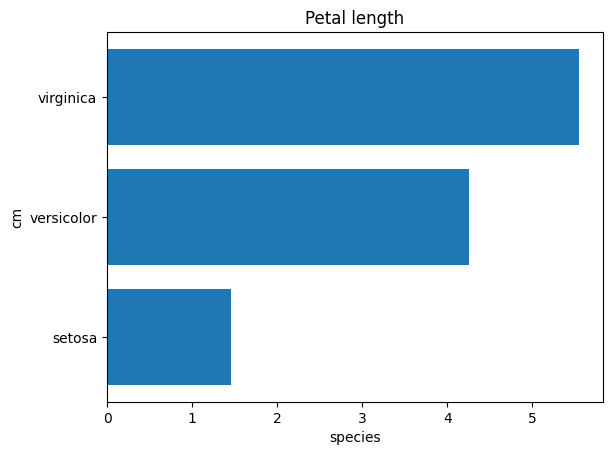

In [32]:
# plot bars horizontally

plt.barh(y=iris_means.index, width=iris_means["petal length"])
plt.title("Petal length")
plt.ylabel("cm")
plt.xlabel("species")

Text(0.5, 0, 'species')

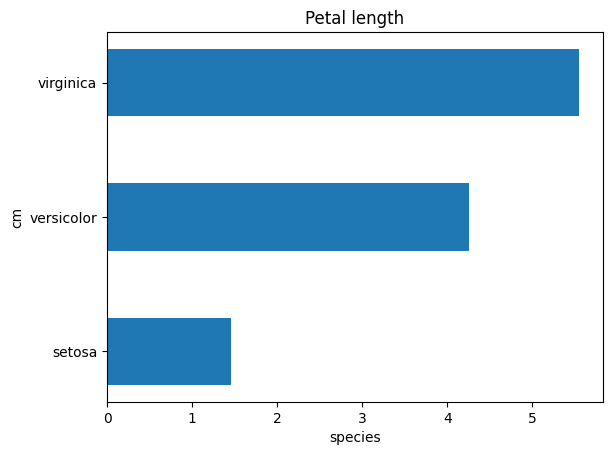

In [33]:
# height
plt.barh(y=iris_means.index, width=iris_means["petal length"], height=0.5)
plt.title("Petal length")
plt.ylabel("cm")
plt.xlabel("species")

### 3. Histograms

Text(0.5, 1.0, 'Distribution of petal lengths')

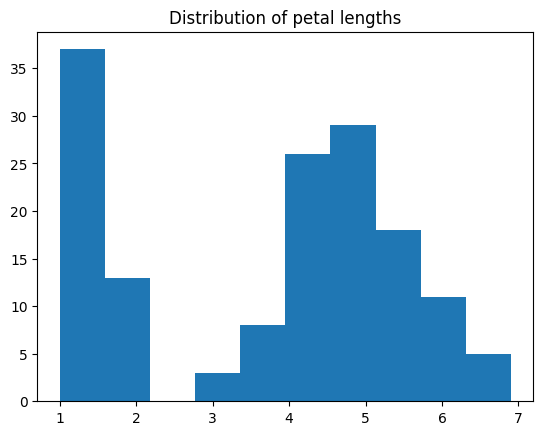

In [34]:
plt.hist(df_iris["petal length"])
plt.title("Distribution of petal lengths")

Text(0.5, 1.0, 'Distribution of petal lengths')

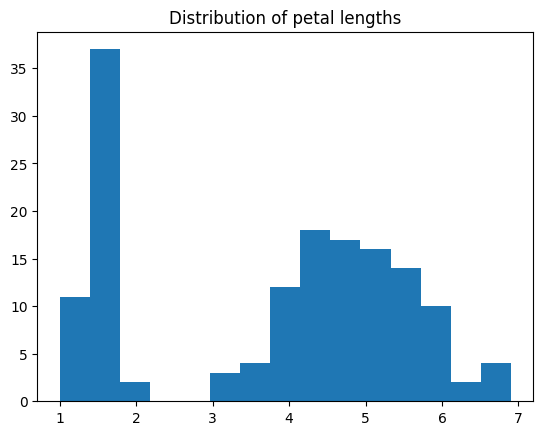

In [35]:
# finer bins
plt.hist(df_iris["petal length"], bins=15)
plt.title("Distribution of petal lengths")

Text(0.5, 1.0, 'Distribution of petal lengths')

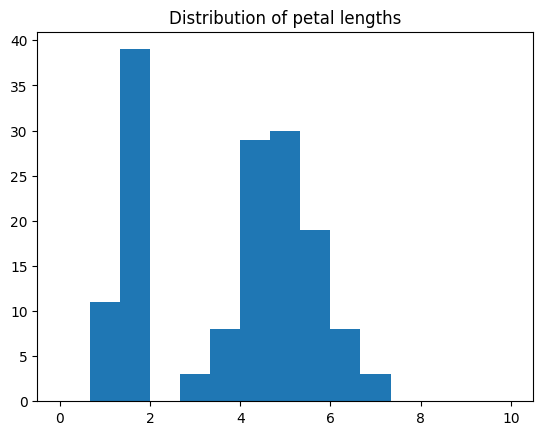

In [36]:
# range
plt.hist(df_iris["petal length"], bins=15, range=(0, 10))
plt.title("Distribution of petal lengths")

### 4. Scatter plots

Text(0, 0.5, 'sepal length')

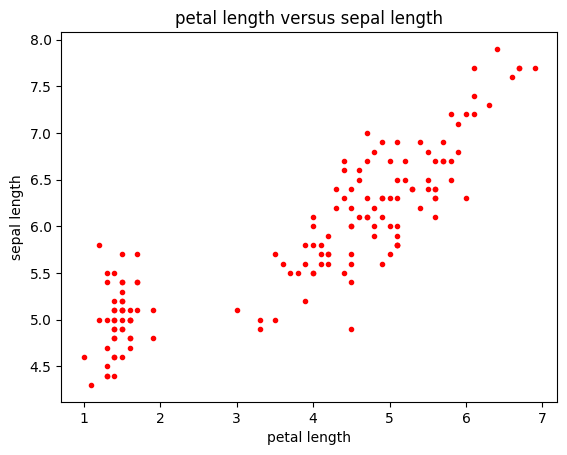

In [37]:
# scatter plot

plt.scatter(df_iris["petal length"], df_iris["sepal length"], color="r", marker=".")
plt.title("petal length versus sepal length")
plt.xlabel("petal length")
plt.ylabel("sepal length")

### 5. Boxes and Violins

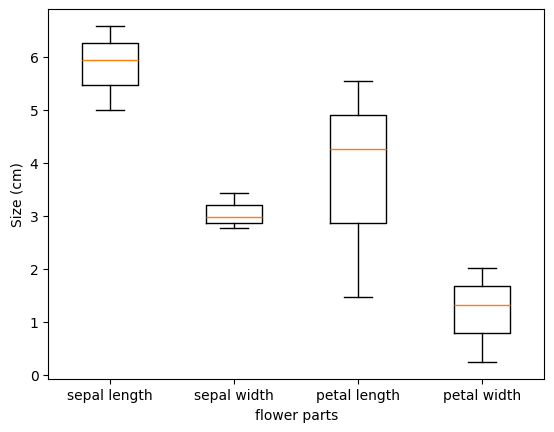

In [40]:
# boxplot

plt.boxplot(iris_means)
plt.xlabel("flower parts")
plt.ylabel("Size (cm)")
plt.xticks(ticks=[1, 2, 3, 4], labels=iris_means.columns)
plt.show()

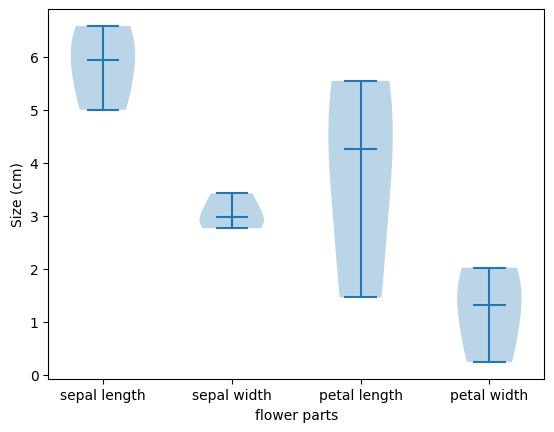

In [41]:
# 
plt.violinplot(iris_means, showmeans=False, showmedians=True, showextrema=True)
plt.xlabel("flower parts")
plt.ylabel("Size (cm)")
plt.xticks(ticks=[1, 2, 3, 4], labels=iris_means.columns)
plt.show()


### 6. Pie Charts

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


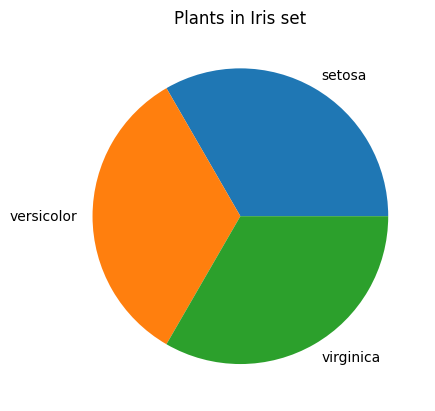

In [43]:
# make a pie chart 

how_many_plants = df_iris["species"].value_counts()
print(how_many_plants)
plt.title("Plants in Iris set")
plt.pie(how_many_plants, labels=how_many_plants.index)
plt.show()

### 7. heatmaps

In [44]:
# here we could use our numeric only data

display(df_iris_numeric)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


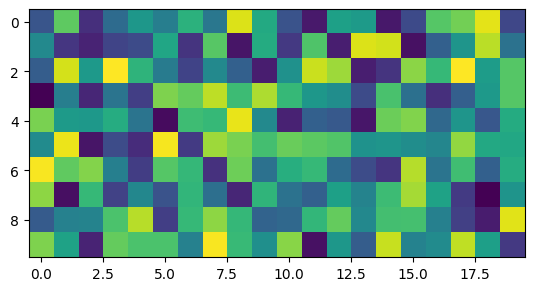

In [45]:
# create a heatmap with random numbers

plt.imshow(np.random.rand(10, 20))

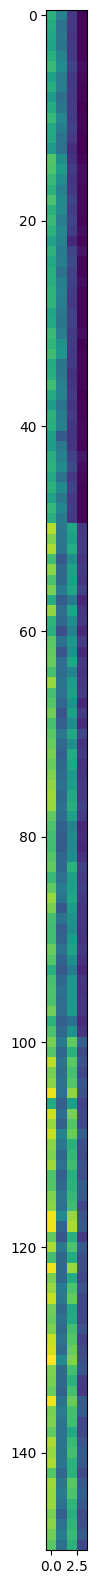

In [46]:
# heatmap

plt.figure(figsize=(5, 20))
plt.imshow(df_iris_numeric)

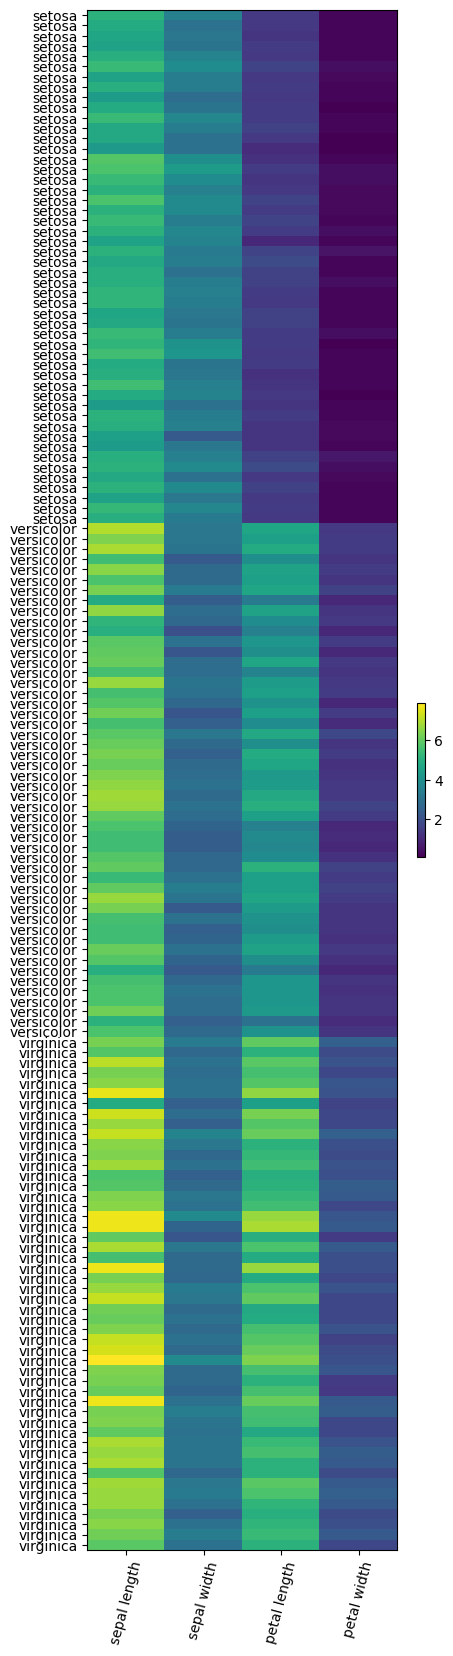

In [47]:
# create a nicer heatmap

plt.figure(figsize=(5, 20))
plt.imshow(df_iris_numeric, aspect="auto")

# add x ticks
plt.xticks(
    np.arange(df_iris_numeric.shape[1]),  # create an array with the tick indices to be shown on the x axis
    labels=df_iris_numeric.columns,  # pass a list/array/Series of labels
    rotation=75  # rotate the labels by 75 degrees
)

# add y ticks
plt.yticks(
    np.arange(df_iris_numeric.shape[0]),  # create an array with the tick indices to be shown on the y axis
    labels=df_iris["species"]    # pass a list/array/Series of labels
)

# add a small color bar
plt.colorbar(shrink=.1)


### 8. Other types of plots

You find all kinds of other plots such as contour plots, probability distributions, stem plots
and you can of course create any kind of plot imaginable yourself. 
The only limit is your imagination and your patience with fiddling with all the elements of a plot.

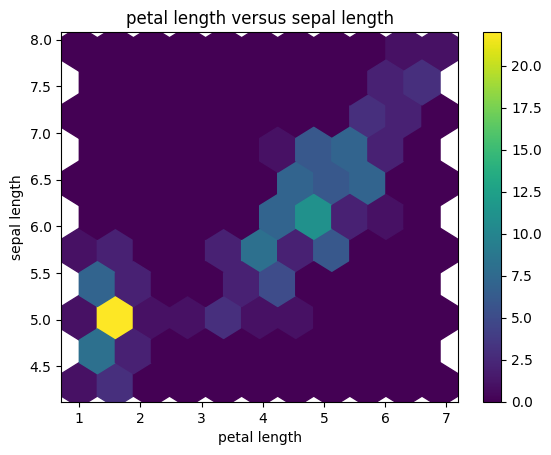

In [48]:
# hex bin

plt.hexbin(df_iris["petal length"], df_iris["sepal length"], gridsize=10)
plt.title("petal length versus sepal length")
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.colorbar()
plt.show()

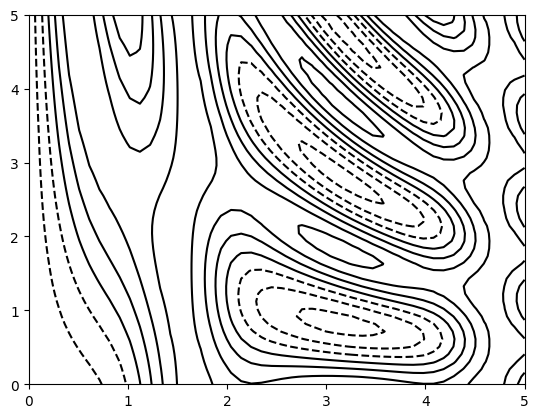

In [49]:
# contour

# make data
def f(x, y):
    """An arbitrary function to create the Z values"""
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
x_grid, y_grid = np.meshgrid(x, y)
z_grid = f(x_grid, y_grid)

# plot contour
plt.contour(x_grid, y_grid, z_grid, colors="black")

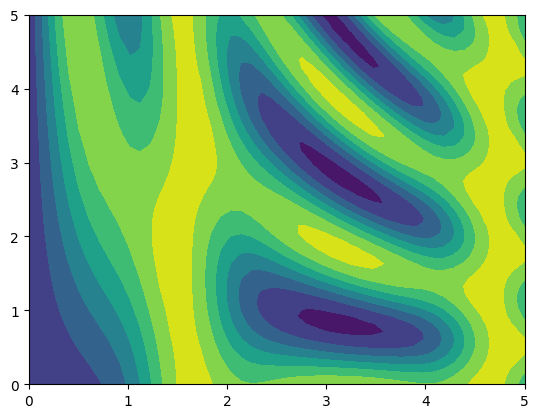

In [50]:
# more contour
plt.contourf(x_grid, y_grid, z_grid)

<StemContainer object of 3 artists>

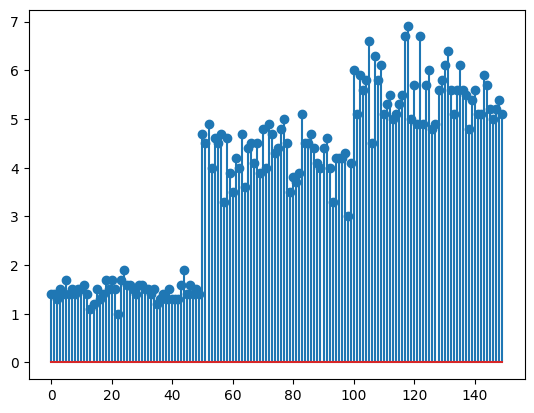

In [51]:
# stem
plt.stem(np.arange(df_iris.shape[0]), df_iris["petal length"])

## Combining plots to create complex <font color="green">**Figures**</font>

A powerful way to use <font color="green">**matplotlib**</font> is to layer different plots on top of each other to create your perfect
<font color="green">**Figure**</font>.
You can do that simply by calling different plotting functions one after another on the same <font color="green">**Figure**</font>. That
will layer them on top of each other.

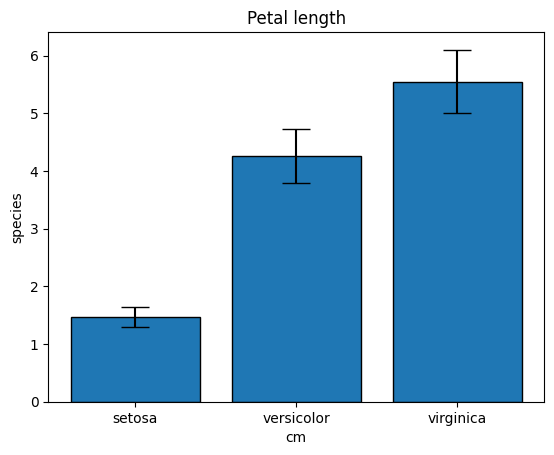

In [54]:
# if you want error bars
# plot bars
plt.bar(x=iris_means.index, height=iris_means["petal length"], edgecolor="k")
plt.errorbar(x=iris_means.index, y=iris_means["petal length"], yerr=iris_std["petal length"], c="k", ls="", capsize=10)
plt.title("Petal length")
plt.xlabel("cm")
plt.ylabel("species")
plt.show()

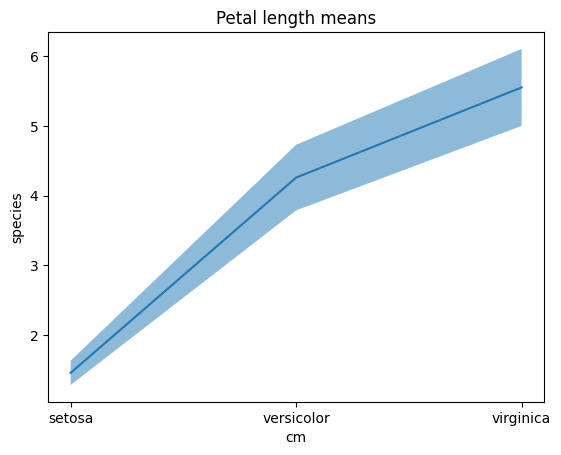

In [56]:
# plot intervals, confidence or standard deviation

y_upper = iris_means["petal length"] + iris_std["petal length"]  # get the upper limit
y_lower = iris_means["petal length"] - iris_std["petal length"]  # get the lower limit

# actually plot the range
plt.fill_between(
    x=iris_means.index, 
    y1=y_upper, 
    y2=y_lower,
    alpha=0.5  # make the are semi-transparent
)
plt.plot(iris_means.index, iris_means["petal length"])  # plot the means
plt.title("Petal length means")  # add a title
plt.xlabel("cm")  # add an x label
plt.ylabel("species")  # add an y label
plt.show()

Grouped bar plots can be created by plotting each category separately and shifting the bars horizontally.

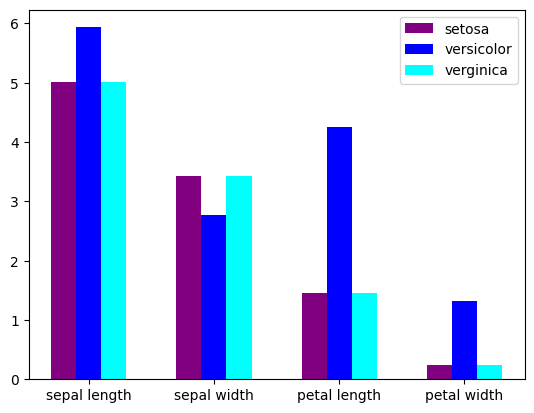

In [57]:
# grouped bar plot

# separate the data into groups manually
df_setosa = df_iris[df_iris["species"] == "setosa"]
df_virginica = df_iris[df_iris["species"] == "verginica"]
df_versicolor = df_iris[df_iris["species"] == "versicolor"]

x = np.arange(1, 5)  # get x axis values for the bars
xlabels = df_iris.columns[:-1]  # get labels for the x axis

# lego build the figure

plt.bar(x-0.2, df_setosa.mean(numeric_only=True), width=0.2, label="setosa", facecolor="purple")
plt.bar(x, df_versicolor.mean(numeric_only=True), width=0.2, label="versicolor", facecolor="blue")
plt.bar(x+0.2, df_setosa.mean(numeric_only=True), width=0.2, label="verginica", facecolor="cyan")

# add ticks, legend and show
plt.xticks(x, labels=xlabels)
plt.legend()
plt.show()

## Summary

Now you should know:

- What is a Figure? Axes? Axis? Artist?
- how plots and figures are created with matplotlib
- how to customize them 
- how to do composite plots and multi-plot figures
- how to save them and how to adapt resolution and figure sizes
- how to layer different plots onto each other


## Exercise 1

Create a plot showing a normal distribution. Hint: Create the data first with NumPy.

## Exercise 2

Create a scatter plot showing the iris data.

a) Plot petal length versus sepal length and have each data point colored according to the iris species.

b) Include a legend.

c) create a Figure that contains the above scatter plot and another scatter plot with petal width versus sepal width side by side in a single Figure. What do you need for that?

## Exercise 3

Create a horizontal bar chart, showing the number of movies the monty python members have worked on and the number of movies they have directed.

## Exercise 4

Use the genes DataFrame from last session as Input and 

a) create a Volcano plot, as you did in the last exercise.

b) show the significantly downregulated genes in blue and the significantly upregulated ones in red, while the non-significant genes should be grey (significantly up means FDR < 0.05 and log2FC > 1).

c) add lines showing the thresholds for "up" and "down regulation"

d) add a line to indicate the threshold for being "significant"

< [8 - Everyone loves pandas](Python%20Crash%208%20-%20Everyone%20loves%20pandas.ipynb) | [Contents](Python%20Crash%20ToC.ipynb) | [10 - Born at sea](Python%20Crash%2010%20-%20Born%20at%20sea.ipynb) >